In [31]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import json
import requests
import scipy.stats as stats
from config import pop_key

In [32]:
# Read .csv file from the cleanup part:
rental_clean_df = pd.read_csv("Analysis/rental_clean.csv")

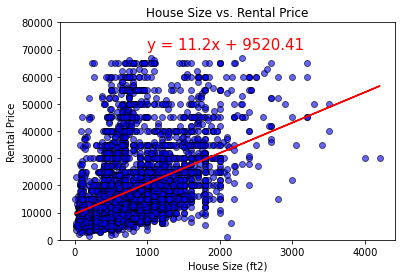

The r-value for this relationship is: 0.3936050052187456.
The r-squared value is: 0.15492490013324875
The plot shows a decent relationship between House Size vs. Rental Price.


In [33]:
# How important is house size for determining the rental price?

# Set x and y values:
x_values = rental_clean_df["Size (ft2)"].astype(float)
y_values = rental_clean_df["Rental Price"].astype(float)

# Use linregress to get the 5 values before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Define regress values and create equation:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "House Size vs. Rental Price" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")
plt.ylim(0,80000)
# Annotate the equation line:
plt.annotate(line_eq,(1000,70000),fontsize=15,color="red")

# Set the title, xlabel, ylabels, and export the figure:
plt.title("House Size vs. Rental Price")
plt.xlabel("House Size (ft2)")
plt.ylabel("Rental Price")
plt.savefig("Plots/House Size vs. Rental Price.png")
plt.show()

# Print the findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"The r-squared value is: {rvalue**2}")
print(f"The plot shows a decent relationship between House Size vs. Rental Price.")

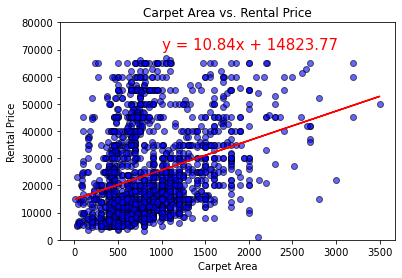

The r-value for this relationship is: 0.32534707814920033.
The r-squared value is: 0.10585072126022187
The plot shows a decent relationship between Carpet Area vs. Rental Price.


In [34]:
# Deep diving into just the "Carpet Area" type to see its distribution with the Rental Price:

# Set x and y values:
carpet_area_df = rental_clean_df[rental_clean_df["Area Type"]=="Carpet Area"]
x_values = carpet_area_df["Size (ft2)"]
y_values = carpet_area_df["Rental Price"]

# Use linregress to get the 5 values before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values and create equation:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Area Type "Carpet Area" vs. Rental Price" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.ylim(0,80000)
plt.plot(x_values, regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(1000,70000),fontsize=15,color="red")

# Set the title, xlabel, ylabels, and export the figure:
plt.title("Carpet Area vs. Rental Price")
plt.xlabel("Carpet Area")
plt.ylabel("Rental Price")
plt.savefig("Plots/Carpet Area vs. Rental Price.png")

plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"The r-squared value is: {rvalue**2}")
print(f"The plot shows a decent relationship between Carpet Area vs. Rental Price.")

F_onewayResult(statistic=225.02227658450894, pvalue=1.3761915378903314e-93)
Ttest_indResult(statistic=-21.191255077849547, pvalue=8.470261686647244e-95)


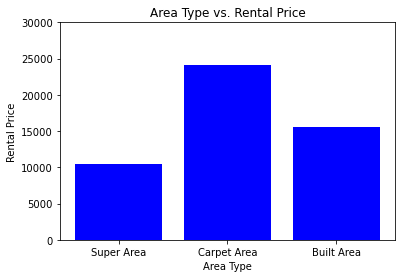

In [35]:
# Does "area type" affect the price?

# Set x and y values:
x_values = ["Super Area", "Carpet Area", "Built Area"]
y_values = rental_clean_df.groupby("Area Type")["Rental Price"].mean()

# Plot Area Type against Rental Price as a bar chart:
plt.bar(x_values, y_values, color="blue")
plt.ylim(0,30000)

# Create groups for statistical analyses:
group0 = rental_clean_df[rental_clean_df["Area Type"] == "Super Area"]["Rental Price"]
group1 = rental_clean_df[rental_clean_df["Area Type"] == "Carpet Area"]["Rental Price"]
group2 = rental_clean_df[rental_clean_df["Area Type"] == "Built Area"]["Rental Price"]
# Perform one-way ANOVA:
print(stats.f_oneway(group0, group1, group2))
# Performing a T-test to check for significance when Built Area is excluded (due to low sample size):
print(stats.ttest_ind(group0, group1))

# Set the title, xlabel, ylabel, and export the figure:
plt.title("Area Type vs. Rental Price")
plt.xlabel("Area Type")
plt.ylabel("Rental Price")
plt.savefig("Plots/Area Type vs. Rental Price.png")

plt.show()

F_onewayResult(statistic=343.11368603474966, pvalue=2.878292787518774e-309)


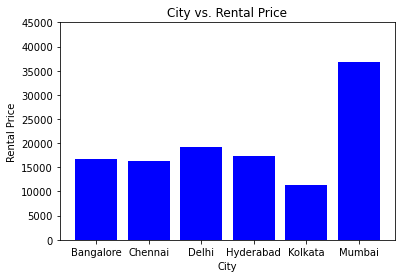

In [36]:
# Does city/location affect the price?

# Set x and y values:
x_values = ["Bangalore", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai"]
y_values = rental_clean_df.groupby("City")["Rental Price"].mean()

# Plot City against Rental Price as a bar chart:
plt.bar(x_values, y_values, color="blue")
plt.ylim(0,45000)

# Perform statistical analyses:
group0 = rental_clean_df[rental_clean_df["City"] == "Kolkata"]["Rental Price"]
group1 = rental_clean_df[rental_clean_df["City"] == "Mumbai"]["Rental Price"]
group2 = rental_clean_df[rental_clean_df["City"] == "Bangalore"]["Rental Price"]
group3 = rental_clean_df[rental_clean_df["City"] == "Delhi"]["Rental Price"]
group4 = rental_clean_df[rental_clean_df["City"] == "Chennai"]["Rental Price"]
group5 = rental_clean_df[rental_clean_df["City"] == "Hyderabad"]["Rental Price"]

print(stats.f_oneway(group0, group1, group2, group3, group4, group5))

# Set the title, xlabel, ylabel, and export the figure:
plt.title("City vs. Rental Price")
plt.xlabel("City")
plt.ylabel("Rental Price")
plt.savefig("Plots/City vs. Rental Price.png")

plt.show()

F_onewayResult(statistic=90.98931803322509, pvalue=2.049113988699276e-39)


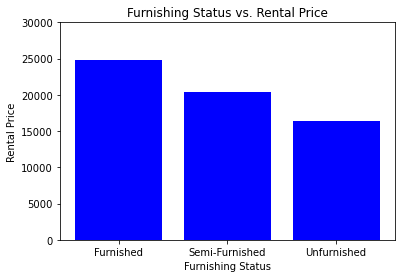

In [37]:
# Does Furnishing Status affect the price?

# Set x and y values:
x_values = ["Furnished", "Semi-Furnished", "Unfurnished"]
y_values = rental_clean_df.groupby("Furnishing Status")["Rental Price"].mean()

# Plot Furnishing Status against Rental Price as a bar chart:
plt.bar(x_values, y_values, color="blue")
plt.ylim(0,30000)

# Perform statistical analyses:
group0 = rental_clean_df[rental_clean_df["Furnishing Status"] == "Unfurnished"]["Rental Price"]
group1 = rental_clean_df[rental_clean_df["Furnishing Status"] == "Semi-Furnished"]["Rental Price"]
group2 = rental_clean_df[rental_clean_df["Furnishing Status"] == "Furnished"]["Rental Price"]

print(stats.f_oneway(group0, group1, group2))

# Set the title, xlabel, ylabel, and export the figure:
plt.title("Furnishing Status vs. Rental Price")
plt.xlabel("Furnishing Status")
plt.ylabel("Rental Price")
plt.savefig("Plots/Furnishing Status vs. Rental Price.png")

plt.show()

F_onewayResult(statistic=946.5971272609561, pvalue=0.0)
Ttest_indResult(statistic=-43.49430420510109, pvalue=0.0)


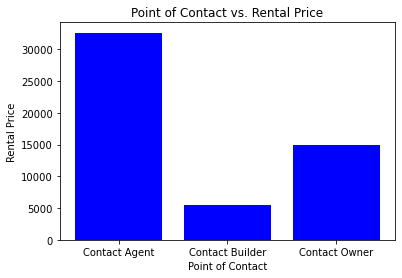

In [38]:
# Does Point of Contact affect the price?

# Set x and y values:
x_values = ["Contact Agent", "Contact Builder", "Contact Owner"]
y_values = rental_clean_df.groupby("Point of Contact")["Rental Price"].mean()

# Plot Point of Contact against Rental Price as a bar chart:
plt.bar(x_values, y_values, color="blue")

# Perform statistical analyses:
group0 = rental_clean_df[rental_clean_df["Point of Contact"] == "Contact Owner"]["Rental Price"]
group1 = rental_clean_df[rental_clean_df["Point of Contact"] == "Contact Agent"]["Rental Price"]
group2 = rental_clean_df[rental_clean_df["Point of Contact"] == "Contact Builder"]["Rental Price"]

print(stats.f_oneway(group0, group1, group2))
# Performing a T-test to check for significance when Contact Builder is excluded (due to low sample size):
print(stats.ttest_ind(group0, group1))

# Set the title, xlabel, ylabel, and export the figure:
plt.title("Point of Contact vs. Rental Price")
plt.xlabel("Point of Contact")
plt.ylabel("Rental Price")
plt.savefig("Plots/Point of Contact vs. Rental Price.png")

plt.show()

F_onewayResult(statistic=253.0041053652975, pvalue=4.2086608138901917e-277)


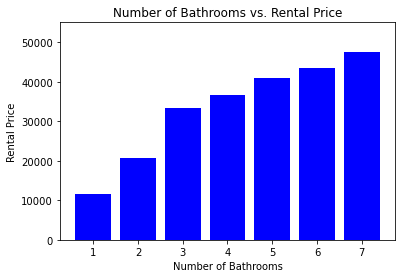

In [39]:
# Does Number of Bathrooms affect the price?

# Set x and y values:
x_values = rental_clean_df.groupby("Number of Bathrooms")["Number of Bathrooms"].unique()
y_values = rental_clean_df.groupby("Number of Bathrooms")["Rental Price"].mean()

# Plot Number of Bathrooms against Rental Price as a bar chart:
plt.bar(x_values, y_values, color="blue")
plt.ylim(0,55000)

# Perform statistical analyses:
group0 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 1]["Rental Price"]
group1 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 2]["Rental Price"]
group2 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 3]["Rental Price"]
group3 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 4]["Rental Price"]
group4 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 5]["Rental Price"]
group5 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 6]["Rental Price"]
group6 = rental_clean_df[rental_clean_df["Number of Bathrooms"] == 7]["Rental Price"]

print(stats.f_oneway(group0, group1, group2, group3, group4, group5, group6))

# Set the title, xlabel, ylabel, and export the figure:
plt.title("Number of Bathrooms vs. Rental Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Rental Price")
plt.savefig("Plots/Number of Bathrooms vs. Rental Price.png")

plt.show()

In [40]:
# Creating empty lists
cities = []
populations = []

# Adding each city to the cities list
cities.append(rental_clean_df["City"].unique())

# Using an API to find populations for each city in the cities list
for city in cities[0]:      
    url = "https://api.api-ninjas.com/v1/city?name=" + city
    response=requests.get(url, headers={"X-Api-Key" : pop_key}).json()
    # Appending returned population to populations list
    populations.append(response[0]["population"])
populations

[17560000, 23355000, 13707000, 29617000, 11324000, 9746000]

In [41]:
# Creating an empty column for population
rental_clean_df["Population"] = ""
# Adding population for each city into Population column, dependent on which city is in the City column
for row in rental_clean_df.index:
    if rental_clean_df["City"][row]=="Kolkata":
        rental_clean_df["Population"][row]=populations[0]
    elif rental_clean_df["City"][row]=="Mumbai":
        rental_clean_df["Population"][row]=populations[1]
    elif rental_clean_df["City"][row]=="Bangalore":
        rental_clean_df["Population"][row]=populations[2]
    elif rental_clean_df["City"][row]=="Delhi":
        rental_clean_df["Population"][row]=populations[3]
    elif rental_clean_df["City"][row]=="Chennai":
        rental_clean_df["Population"][row]=populations[4]
    elif rental_clean_df["City"][row]=="Hyderabad":
        rental_clean_df["Population"][row]=populations[5]

c:\Users\frank\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\frank\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\frank\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load s

In [42]:
# Does Population affect the price?

# Create groups for each city for statistical analyses
group0 = rental_clean_df[rental_clean_df["Population"] == populations[0]]["Rental Price"]
group1 = rental_clean_df[rental_clean_df["Population"] == populations[1]]["Rental Price"]
group2 = rental_clean_df[rental_clean_df["Population"] == populations[2]]["Rental Price"]
group3 = rental_clean_df[rental_clean_df["Population"] == populations[3]]["Rental Price"]
group4 = rental_clean_df[rental_clean_df["Population"] == populations[4]]["Rental Price"]
group5 = rental_clean_df[rental_clean_df["Population"] == populations[5]]["Rental Price"]

# Perform a one-way ANOVA
print(stats.f_oneway(group0, group1, group2, group3, group4, group5))

F_onewayResult(statistic=343.11368603474966, pvalue=2.878292787518774e-309)


In [43]:
# Change columns format as follows:
rental_clean_df["Rental Price"] = rental_clean_df["Rental Price"].map("{:,.0f}".format)
rental_clean_df["Size (ft2)"] = rental_clean_df["Size (ft2)"].map("{:,.0f}".format)

In [44]:
# Display DataFrame
rental_clean_df

,Unnamed: 0,Posted On,"Bedrooms, Halls, Kitchens",Rental Price,Size (ft2),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Number of Bathrooms,Point of Contact,Population
0,0,2022-05-18,2,"10,000","1,100",Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,17560000
1,1,2022-05-13,2,"20,000",800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17560000
2,2,2022-05-16,2,"17,000","1,000",Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17560000
3,3,2022-07-04,2,"10,000",800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,17560000
4,4,2022-05-09,2,"7,500",850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,17560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,4741,2022-05-18,2,"15,000","1,000",Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,9746000
4222,4742,2022-05-15,3,"29,000","2,000",Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,9746000
4223,4743,2022-07-10,3,"35,000","1,750",Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,9746000
4224,4744,2022-07-06,3,"45,000","1,500",Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,9746000
